# -------------------------NETFLIX DATA ANALYSIS PROJECT----------------------------

### Import Libraries

In [2]:
# Data Manipulation and Analysis
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Text Analysis
from textblob import TextBlob

# Utility for Frequency Count
from collections import Counter

# Regular Expressions
import re

# Handling warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the CSV file
df=pd.read_csv("netflix_titles.csv")

In [4]:
# Display first 5 rows for quick glance
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

## Step 1. Data Overview and Understanding

In [5]:
# Display the shape of the data
print("Data Shape: ", df.shape)

Data Shape:  (8807, 12)


In [6]:
# Display the name of each column in the data
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [7]:
# Display the data types of the columns in the data
print(df.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [8]:
# checj data structure and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


observation:
- Handling missing values in director, country, and cast may be necessary.
- date_added should be converted to datetime for time-based analysis.
- duration is stored as an object, so extracting numeric values could help in quantitative analysis.

In [9]:
# Generate descriptive statistics for numerical columns
df.describe()

release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

In [10]:
# Generate descriptive statistics specifically for categorical (object) columns
df.describe(include='object')

show_id   type                 title       director  \
count     8807   8807                  8807           6173   
unique    8807      2                  8807           4528   
top         s1  Movie  Dick Johnson Is Dead  Rajiv Chilaka   
freq         1   6131                     1             19   

                      cast        country       date_added rating  duration  \
count                 7982           7976             8797   8803      8804   
unique                7692            748             1767     17       220   
top     David Attenborough  United States  January 1, 2020  TV-MA  1 Season   
freq                    19           2818              109   3207      1793   

                           listed_in  \
count                           8807   
unique                           514   
top     Dramas, International Movies   
freq                             362   

                                              description  
count                                                8807  
unique                                               8775  
top     Paranormal activity at a lush, abandoned prope...  
freq                                                    4

In [11]:
# Iterate through categorical columns excluding 'cast' and 'description' to print unique values
for col in df.select_dtypes(include='object').columns:
    if col not in ['cast', 'description']:  # Exclude specified columns
        print(f"Column: {col}")
        print(df[col].unique()[:10])  # Display only the first 10 unique values
        print(f"Total Unique Values: {df[col].nunique()}")
        print('-'*50)

Column: show_id
['s1' 's2' 's3' 's4' 's5' 's6' 's7' 's8' 's9' 's10']
Total Unique Values: 8807
--------------------------------------------------
Column: type
['Movie' 'TV Show']
Total Unique Values: 2
--------------------------------------------------
Column: title
['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands'
 'Jailbirds New Orleans' 'Kota Factory' 'Midnight Mass'
 'My Little Pony: A New Generation' 'Sankofa'
 'The Great British Baking Show' 'The Starling']
Total Unique Values: 8807
--------------------------------------------------
Column: director
['Kirsten Johnson' nan 'Julien Leclercq' 'Mike Flanagan'
 'Robert Cullen, José Luis Ucha' 'Haile Gerima' 'Andy Devonshire'
 'Theodore Melfi' 'Kongkiat Komesiri' 'Christian Schwochow']
Total Unique Values: 4528
--------------------------------------------------
Column: country
['United States' 'South Africa' nan 'India'
 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'
 'United Kingdom' 'Germany, Czech Republic

## Step 2. EDA - Data Cleaning

### 2.1 Remove duplicates

In [12]:
# Check for duplicates
print("Duplicate Rows: ", df.duplicated().sum())

Duplicate Rows:  0


### Inspecting Missing values in the Dataset

In [13]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [14]:
# check for pecentage of the missing values
round((df.isnull().sum()/df.shape[0])*100,2).sort_values(ascending=False)

director        29.91
country          9.44
cast             9.37
date_added       0.11
rating           0.05
duration         0.03
show_id          0.00
type             0.00
title            0.00
release_year     0.00
listed_in        0.00
description      0.00
dtype: float64

### Adjust Data Types and Fill in Missing Values
Verify datatypes make sense. Except release_year, all are objects/Strings as expected.

#### **The following do not require any fills**
- type
- title
- release_year
- listed_in
- description

#### **The following are missing data:**
- duration
- rating
- date_added
- cast
- country
- director
- Check data types, update types where needed and proceed.

### 2.2 Handling Missing Values

#### Lets fix the null values in 'rating', 'country','cast','director' columns

In [15]:
# Fill missing values for categorical columns
df.fillna({'rating': 'Unavailable', 'cast': 'Unavailable', 'country':'Unknown', 'director': 'Unavailable'}, inplace=True)

In [16]:
# After Handling missing values
(df.isnull().sum()).sort_values(ascending=False)

date_added      10
duration         3
show_id          0
type             0
title            0
director         0
cast             0
country          0
release_year     0
rating           0
listed_in        0
description      0
dtype: int64

#### Fixing missing values in 'date_added' column

In [17]:
# printing the rows with missing values of 'date_added' column
df[df.date_added.isnull()]

show_id     type                                        title  \
6066   s6067  TV Show  A Young Doctor's Notebook and Other Stories   
6174   s6175  TV Show              Anthony Bourdain: Parts Unknown   
6795   s6796  TV Show                                      Frasier   
6806   s6807  TV Show                                      Friends   
6901   s6902  TV Show                              Gunslinger Girl   
7196   s7197  TV Show                                     Kikoriki   
7254   s7255  TV Show                          La Familia P. Luche   
7406   s7407  TV Show                                        Maron   
7847   s7848  TV Show                                 Red vs. Blue   
8182   s8183  TV Show                 The Adventures of Figaro Pho   

         director                                               cast  \
6066  Unavailable  Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...   
6174  Unavailable                                   Anthony Bourdain   
6795  Unavailable  Kelsey Grammer, Jane Leeves, David Hyde Pierce...   
6806  Unavailable  Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...   
6901  Unavailable  Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...   
7196  Unavailable                                      Igor Dmitriev   
7254  Unavailable  Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...   
7406  Unavailable  Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...   
7847  Unavailable  Burnie Burns, Jason Saldaña, Gustavo Sorola, G...   
8182  Unavailable  Luke Jurevicius, Craig Behenna, Charlotte Haml...   

             country date_added  release_year rating    duration  \
6066  United Kingdom        NaN          2013  TV-MA   2 Seasons   
6174   United States        NaN          2018  TV-PG   5 Seasons   
6795   United States        NaN          2003  TV-PG  11 Seasons   
6806   United States        NaN          2003  TV-14  10 Seasons   
6901           Japan        NaN          2008  TV-14   2 Seasons   
7196         Unknown        NaN          2010   TV-Y   2 Seasons   
7254   United States        NaN          2012  TV-14   3 Seasons   
7406   United States        NaN          2016  TV-MA   4 Seasons   
7847   United States        NaN          2015     NR  13 Seasons   
8182       Australia        NaN          2015  TV-Y7   2 Seasons   

                                              listed_in  \
6066           British TV Shows, TV Comedies, TV Dramas   
6174                                         Docuseries   
6795                     Classic & Cult TV, TV Comedies   
6806                     Classic & Cult TV, TV Comedies   
6901                       Anime Series, Crime TV Shows   
7196                                           Kids' TV   
7254  International TV Shows, Spanish-Language TV Sh...   
7406                                        TV Comedies   
7847  TV Action & Adventure, TV Comedies, TV Sci-Fi ...   
8182                              Kids' TV, TV Comedies   

                                            description  
6066  Set during the Russian Revolution, this comic ...  
6174  This CNN original series has chef Anthony Bour...  
6795  Frasier Crane is a snooty but lovable Seattle ...  
6806  This hit sitcom follows the merry misadventure...  
6901  On the surface, the Social Welfare Agency appe...  
7196  A wacky rabbit and his gang of animal pals hav...  
7254  This irreverent sitcom featues Ludovico, Feder...  
7406  Marc Maron stars as Marc Maron, who interviews...  
7847  This parody of first-person shooter games, mil...  
8182  Imagine your worst fears, then multiply them: ...

#### Substituting with most recent date from date_added

In [18]:
# Convert 'date_added' to datetime format, handling errors safely
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [19]:
#For most recent date, we use .max()
most_recent_date=df['date_added'].max()
df.fillna({'date_added': most_recent_date}, inplace=True)

In [20]:
# Check for new values after fixing NaN values
df[df.show_id =='s6067']

show_id     type                                        title  \
6066   s6067  TV Show  A Young Doctor's Notebook and Other Stories   

         director                                               cast  \
6066  Unavailable  Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...   

             country date_added  release_year rating   duration  \
6066  United Kingdom 2021-09-25          2013  TV-MA  2 Seasons   

                                     listed_in  \
6066  British TV Shows, TV Comedies, TV Dramas   

                                            description  
6066  Set during the Russian Revolution, this comic ...

#### Fixing duration column error

In [21]:
# Step 1: Find rows where the 'duration' column has null values (NaN).
df[df['duration'].isnull()]

show_id   type                                 title    director  \
5541   s5542  Movie                       Louis C.K. 2017  Louis C.K.   
5794   s5795  Movie                 Louis C.K.: Hilarious  Louis C.K.   
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country date_added  release_year  rating duration  \
5541  Louis C.K.  United States 2017-04-04          2017  74 min      NaN   
5794  Louis C.K.  United States 2016-09-16          2010  84 min      NaN   
5813  Louis C.K.  United States 2016-08-15          2015  66 min      NaN   

     listed_in                                        description  
5541    Movies  Louis C.K. muses on religion, eternal love, gi...  
5794    Movies  Emmy-winning comedy writer Louis C.K. brings h...  
5813    Movies  The comic puts his trademark hilarious/thought...

check to make sure that there is no other content with the same director called 'Louis C.K.' to avoid accidental overwriting

In [22]:
# Step 2: Filter the dataframe to display the first few rows where the director is 'Louis C.K.'
df[df['director'] == 'Louis C.K.'].head()

show_id   type                                 title    director  \
5541   s5542  Movie                       Louis C.K. 2017  Louis C.K.   
5794   s5795  Movie                 Louis C.K.: Hilarious  Louis C.K.   
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country date_added  release_year  rating duration  \
5541  Louis C.K.  United States 2017-04-04          2017  74 min      NaN   
5794  Louis C.K.  United States 2016-09-16          2010  84 min      NaN   
5813  Louis C.K.  United States 2016-08-15          2015  66 min      NaN   

     listed_in                                        description  
5541    Movies  Louis C.K. muses on religion, eternal love, gi...  
5794    Movies  Emmy-winning comedy writer Louis C.K. brings h...  
5813    Movies  The comic puts his trademark hilarious/thought...

hence there is no other content with the director called 'Louis C.K.', just overwrite the duration with rating values and then check

In [23]:
# Step 3: Replace the 'duration' value with the corresponding 'rating' value for rows where the director is 'Louis C.K.'
# Potential Issue: If 'rating' contains non-numeric values, this can lead to unexpected results.
df.loc[df.director == 'Louis C.K.', 'duration'] = df['rating']

# Step 4: Display the first few rows after the 'duration' update to verify the changes.
df[df.director == 'Louis C.K.'].head()

show_id   type                                 title    director  \
5541   s5542  Movie                       Louis C.K. 2017  Louis C.K.   
5794   s5795  Movie                 Louis C.K.: Hilarious  Louis C.K.   
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country date_added  release_year  rating duration  \
5541  Louis C.K.  United States 2017-04-04          2017  74 min   74 min   
5794  Louis C.K.  United States 2016-09-16          2010  84 min   84 min   
5813  Louis C.K.  United States 2016-08-15          2015  66 min   66 min   

     listed_in                                        description  
5541    Movies  Louis C.K. muses on religion, eternal love, gi...  
5794    Movies  Emmy-winning comedy writer Louis C.K. brings h...  
5813    Movies  The comic puts his trademark hilarious/thought...

In [24]:
# Step 5: Replace the 'rating' column with the string 'Unavailable' for rows where the director is 'Louis C.K.'
df.loc[df.director == 'Louis C.K.', 'rating'] = 'Unavailable'

# Step 6: Display the first few rows after the 'rating' update to ensure the changes were applied correctly.
df[df.director == 'Louis C.K.'].head()

show_id   type                                 title    director  \
5541   s5542  Movie                       Louis C.K. 2017  Louis C.K.   
5794   s5795  Movie                 Louis C.K.: Hilarious  Louis C.K.   
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country date_added  release_year       rating  \
5541  Louis C.K.  United States 2017-04-04          2017  Unavailable   
5794  Louis C.K.  United States 2016-09-16          2010  Unavailable   
5813  Louis C.K.  United States 2016-08-15          2015  Unavailable   

     duration listed_in                                        description  
5541   74 min    Movies  Louis C.K. muses on religion, eternal love, gi...  
5794   84 min    Movies  Emmy-winning comedy writer Louis C.K. brings h...  
5813   66 min    Movies  The comic puts his trademark hilarious/thought...

In [25]:
# After Handling all missing values of all columns
round((df.isnull().sum()/df.shape[0])*100,2).sort_values(ascending=False)

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [27]:
df.describe()

date_added  release_year
count                           8807   8807.000000
mean   2019-06-01 14:20:32.019984128   2014.180198
min              2008-01-01 00:00:00   1925.000000
25%              2018-04-30 12:00:00   2013.000000
50%              2019-07-26 00:00:00   2017.000000
75%              2020-09-08 00:00:00   2019.000000
max              2021-09-25 00:00:00   2021.000000
std                              NaN      8.819312

### 2.3 Outlier Detection

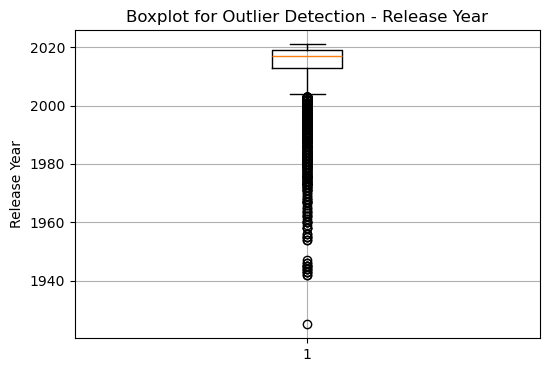

In [28]:
## ---Figure 1---
# boxplot to detect outliers in the 'release_year' column
plt.figure(figsize=(6, 4))
plt.boxplot(df['release_year'])
plt.title('Boxplot for Outlier Detection - Release Year')
plt.ylabel('Release Year')
plt.grid(True)
plt.show()

Observation:
- The plot identifies a significant number of outliers with release years before the 2000s. These may include old classic movies, documentaries, or historical content added to the platform.
- The presence of extreme outliers may suggest possible data entry errors or incorrect release years. Data cleaning is necessary to ensure accurate analysis.

In [29]:
# Calculate IQR
Q1 = df['release_year'].quantile(0.25)
Q3 = df['release_year'].quantile(0.75)
IQR = Q3 - Q1

In [30]:
# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [31]:
# Identify rows where the 'release_year' is below the lower_bound or above the upper_bound (outliers)
outliers = df[(df['release_year'] < lower_bound) | (df['release_year'] > upper_bound)]

# Print the total number of detected outliers
print(f"Total Outliers Detected: {len(outliers)}")

Total Outliers Detected: 719


In [32]:
#  Remove Outliers
filtered_df = df[(df['release_year'] >= lower_bound) & (df['release_year'] <= upper_bound)]

In [33]:
# Print the total number of records in the original dataset
print(f"Original Data Count: {len(df)}")

# Print the total number of records remaining after removing outliers
print(f"Data After Removing Outliers: {len(filtered_df)}")

Original Data Count: 8807
Data After Removing Outliers: 8088


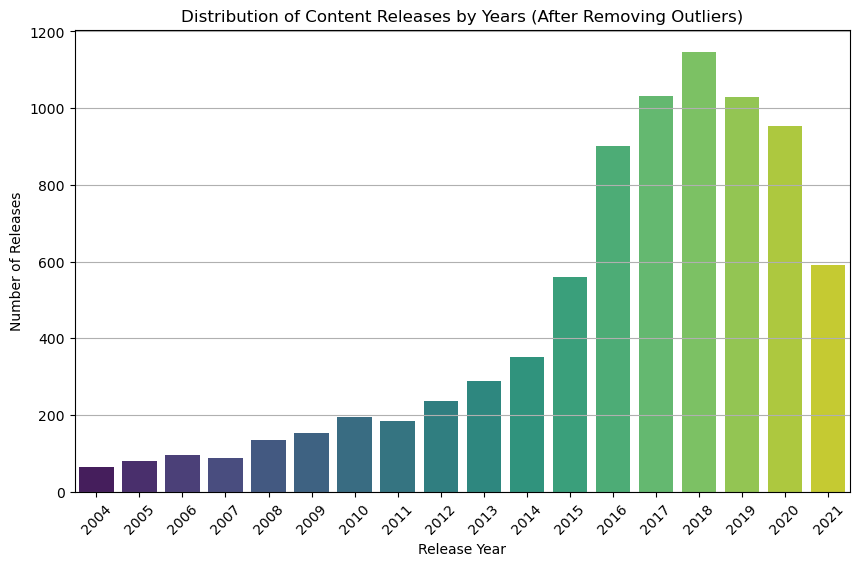

In [34]:
## --- Figure 2 ---
# Distribution of Release Years (After Removing Outliers)
# Set figure size for better visualization
plt.figure(figsize=(10, 6))
# Plot the number of releases per year using Seaborn countplot
sns.countplot(x='release_year', data=filtered_df, palette='viridis', order=sorted(filtered_df['release_year'].unique()))
# Add title and labels for better understanding
plt.title('Distribution of Content Releases by Years (After Removing Outliers)')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
# Rotate x-axis labels for better visibility              
plt.xticks(rotation=45)
# Add grid lines on the y-axis for clarity              
plt.grid(axis='y')
# Display the plot              
plt.show()


✅ Insights:
- There has been a significant growth in content production from 2016 to 2019, peaking in 2018.
- A sharp decline is visible in 2020 and 2021, possibly influenced by the COVID-19 pandemic, leading to production halts.
- The consistent upward trend before 2020 suggests a strong content acquisition strategy by Netflix.

💡 Recommendations:
- Content Recovery Strategy: Focus on accelerating production in 2024-2025 to regain momentum lost due to pandemic disruptions.
- Localized Content Production: Invest in regional content where restrictions are minimal to mitigate global disruptions.
- Content Quality vs Quantity: Prioritize high-quality original content instead of oversaturating the platform with average content.

### 2.4 Univariate Columns

Rating Column

In [35]:
# Get the value counts of the 'rating' column to check its distribution
rating_vc = df.rating.value_counts()
rating_vc

rating
TV-MA          3207
TV-14          2160
TV-PG           863
R               799
PG-13           490
TV-Y7           334
TV-Y            307
PG              287
TV-G            220
NR               80
G                41
Unavailable       7
TV-Y7-FV          6
NC-17             3
UR                3
Name: count, dtype: int64

In [36]:
# Define a threshold to categorize rare ratings as 'Other' 
threshold = 50

# Transform ratings below the threshold to 'Other' 
df['rating'] = df['rating'].apply(lambda x: 'Other' if rating_vc[x] < threshold else x)

In [37]:
# Verify the transformed rating categories
print(df['rating'].value_counts())

rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Other      60
Name: count, dtype: int64


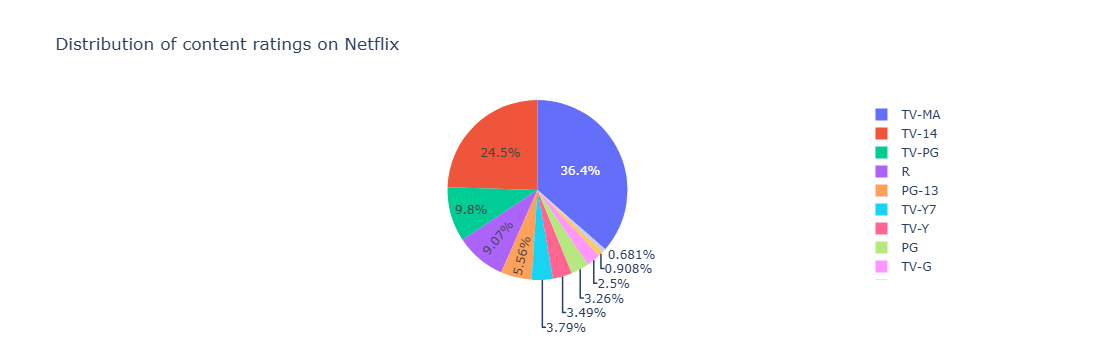

<Figure size 900x600 with 0 Axes>

In [38]:
## --- Figure 3 ---
# Pie chart to find distribution of Content Ratings on Netflix

# Set figure size for better visualization
plt.figure(figsize=(9,6))
colors = sns.color_palette('pastel')[0:5]
x= df.groupby(['rating']).size().reset_index(name='counts')
pieChart=px.pie(x, values='counts', names='rating', title= 'Distribution of content ratings on Netflix')
pieChart.show()

✅ Insights:
- Netflix predominantly caters to mature audiences, with TV-MA (36.4%) and TV-14 (24.5%) as the leading categories.
- Family-friendly content (TV-Y, TV-G, PG) forms a smaller proportion, limiting options for younger viewers.

💡 Recommendations:
- Introduce more family-oriented and children’s content to attract a wider demographic.
- Focus on regional and cultural preferences to diversify content offerings.
Implement personalized recommendations based on viewer preferences to boost engagement.


Country column

In [39]:
# Extracting top 10 countries with the most content on Netflix
top_countries = df['country'].value_counts().head(10)

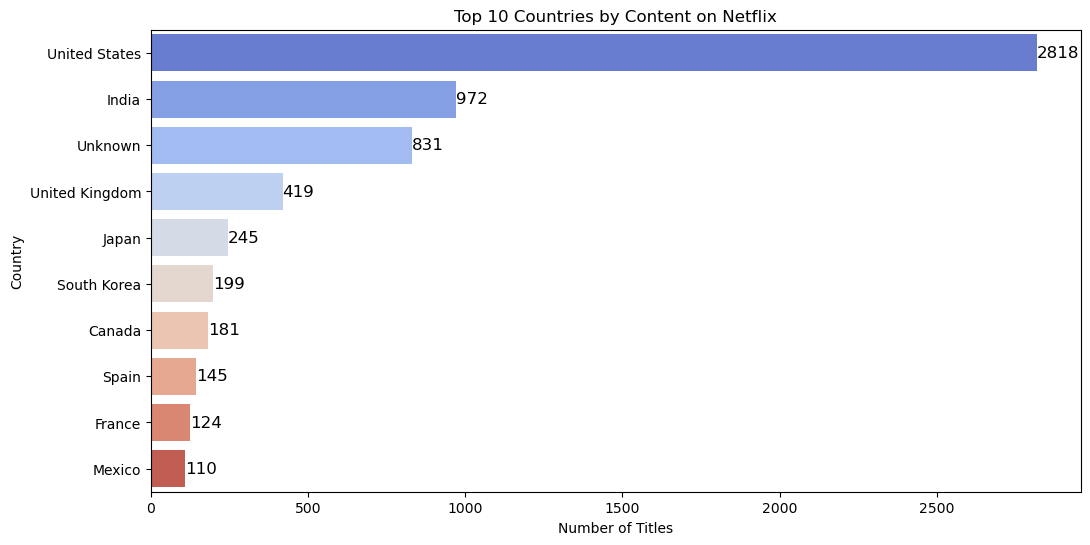

In [40]:
## --- Figure 4 ---
# Bar chart to visualize the data
plt.figure(figsize=(12,6))
ax = sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')

for i, value in enumerate(top_countries.values):
    ax.text(value, i, str(value), ha='left', va='center', fontsize=12, color='black')

# Add labels and titile
plt.title('Top 10 Countries by Content on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

📊 Insights:
- The United States dominates the content library with 2818 titles, contributing a significant portion of Netflix's content.
- India follows as a major content producer with 972 titles, reflecting its large entertainment industry.
- A notable number of titles (831) are listed under Unknown — possibly indicating incomplete or unrecorded data.
- Other prominent contributors include the United Kingdom (419), Japan (245), and South Korea (199), known for their global entertainment influence.
  
💡 Recommendations:
- Enhance partnerships with content creators in emerging markets like India and South Korea to further diversify the platform's content.
- Invest in regional content production and localized marketing to engage audiences in underserved regions.
- Improve data accuracy to reduce the "Unknown" category by implementing stricter metadata validation.


Cast column

In [41]:
# Get the top 10 Actors by value counts
df.cast.value_counts().head(10)

cast
Unavailable                                                                                                               825
David Attenborough                                                                                                         19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                    14
Samuel West                                                                                                                10
Jeff Dunham                                                                                                                 7
Craig Sechler                                                                                                               6
David Spade, London Hughes, Fortune Feimster                                                                                6
Kevin Hart                                                                                                       

In [42]:
# Filter out 'Unavailable' actors
filtered_df = df[df['cast'] != 'Unavailable']

In [43]:
# Split the 'cast' col (which contains csv) and explode into individual actors
actors = filtered_df['cast'].str.split(',').explode().str.strip()

In [44]:
# Remove any remaining 'Unavailable' actors
actors = actors[actors != 'Unavailable']

In [45]:
# Get the top 10 actors by appearance
top_actors = actors.value_counts().head(10)

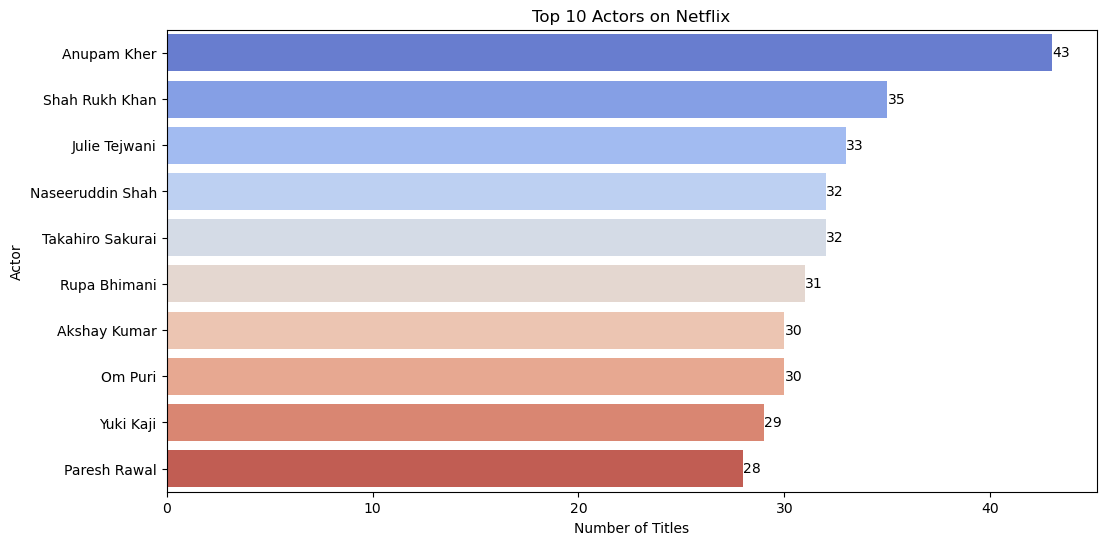

In [46]:
## --- Figure 5 ---
# Bar plot to find the top 10 actors on Netflix

plt.figure(figsize=(12,6))
ax = sns.barplot(x=top_actors.values, y=top_actors.index, palette='coolwarm')
plt.title('Top 10 Actors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')

for i, value in enumerate(top_actors.values):
    ax.text(value, i, str(value), ha='left', va='center', fontsize=10, color='black')
    
plt.show()

📊 Insights:
- Anupam Kher leads with 43 titles, followed by Shah Rukh Khan with 35 titles, indicating their significant presence on the platform.
- Indian actors like Julie Tejwani, Naseeruddin Shah, and Akshay Kumar also have a notable number of titles, emphasizing Netflix's growing focus on Bollywood and regional content.
- Takahiro Sakurai and Yuki Kaji represent Japanese content, reflecting the increasing global demand for anime.

💡 Recommendations:
- Continue expanding partnerships with leading actors in emerging markets, particularly in India and Japan.
- Promote actor-based collections or curated lists to engage fans of specific stars.
- Invest in exclusive contracts with popular actors to increase platform exclusivity and viewership.

Director column

In [47]:
# Display the top 10 directors by value counts
df.director.value_counts().head(10)

director
Unavailable               2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Name: count, dtype: int64

In [48]:
# Filter out the rows where 'director' is 'Unavailable'
filtered_df = filtered_df[filtered_df['director'] != 'Unavailable']

In [49]:
# Split multiple directors into separate rows
directors = filtered_df['director'].dropna().str.split(',').explode().str.strip()

In [50]:
# Get the top 10 directors
top_directors = directors.value_counts().head(10)

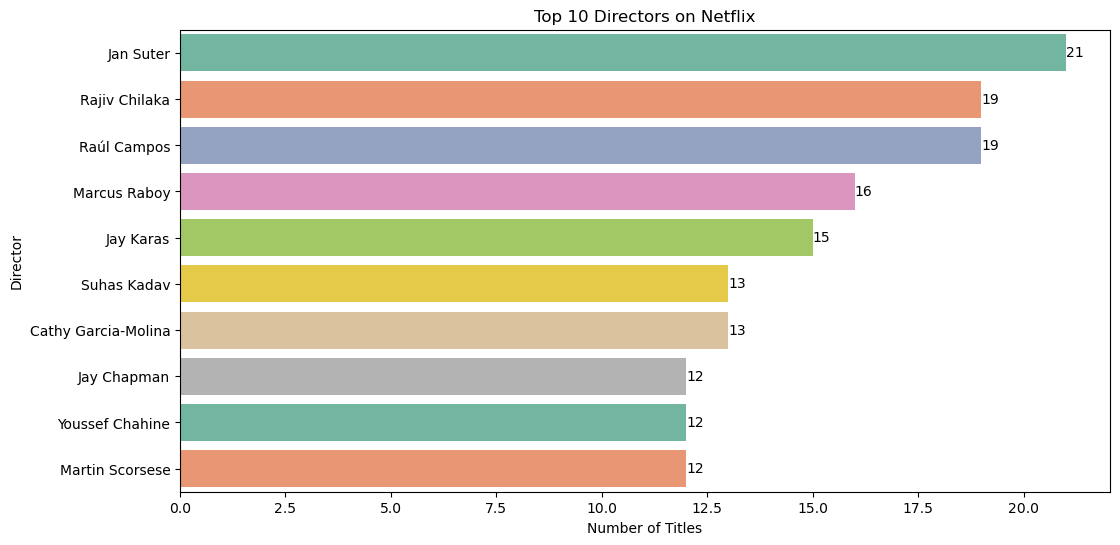

In [51]:
## --- Figure 6 ---
# Bar plot to find the top 10 directors on Netflix
plt.figure(figsize=(12,6))
ax = sns.barplot(x=top_directors.values, y=top_directors.index, palette='Set2')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')

for i, value in enumerate(top_directors.values):
    ax.text(value, i, str(value), ha='left', va='center', fontsize=10, color='black')

plt.show()

📊 Insights:
- Rajiv Chilaka leads with 19 titles, highlighting a strong presence in the animated and children's content segment.
- Raúl Campos and Jan Suter are prominent with 18 titles, indicating popularity in the documentary or regional content space.
- Steven Spielberg and Martin Scorsese bring Hollywood credibility, contributing to Netflix's focus on exclusive cinematic experiences.

💡 Recommendations:
- Leverage Popular Directors: Continue collaborating with top-performing directors to enhance the content library.
- Regional Expansion: Invest in regional filmmakers like Suhas Kadav and Rajiv Chilaka to expand in key markets such as India.
- Exclusive Deals: Secure exclusive contracts with globally recognized directors for Netflix Originals to drive subscriptions.

Listed_in column

In [52]:
# View the top 10 genres before processing
print("Top 10 Genres Before Cleaning:")
print(df['listed_in'].value_counts().head(10))

Top 10 Genres Before Cleaning:
listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64


In [53]:
# Clean and normalize the 'listed_in' column
# 1. Remove leading and trailing spaces using str.strip()
# 2. Remove unnecessary spaces within genre names using str.replace()
df['listed_in'] = df['listed_in'].str.strip().str.replace(' ', '')

In [54]:
# Split the genres by comma, explode to separate each genre, and strip extra spaces
genres = df['listed_in'].str.split(',').explode().str.strip()

In [55]:
# Standardize genre names to title case to avoid duplicates(e.g., 'drama' -> 'Drama')
genres = genres.str.title()

In [56]:
# CAlculate the top 10 most common genres using Counter
top_genres = pd.DataFrame(Counter(genres).most_common(10), columns=['Genre', 'Count'])

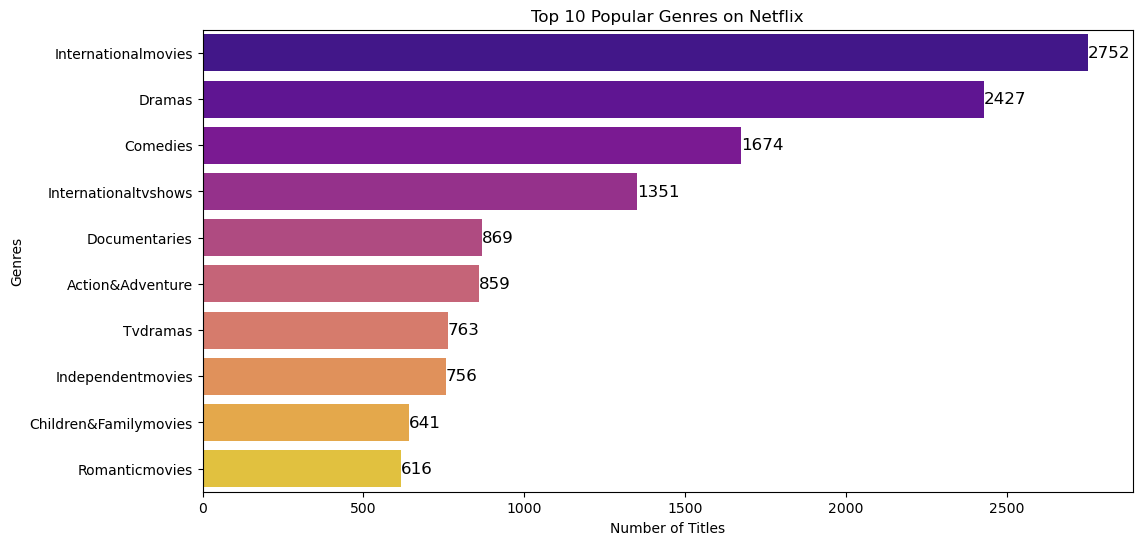

In [57]:
## ---Figure 7 ---
# Bar plot to find the Top 10 Popular Genres
plt.figure(figsize=(12,6))
ax = sns.barplot(x='Count', y='Genre', data=top_genres, palette='plasma')
plt.title('Top 10 Popular Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genres')

#  Display count values on the bars
for index, value in enumerate(top_genres['Count']):
    ax.text(value, index, str(value), va='center', ha='left', fontsize=12, color='black')

plt.show()

📊 Insights:
- International Movies are the most popular genre with 2752 titles, indicating a strong focus on global content.
- Dramas and Comedies are also highly represented, reflecting user preference for engaging narratives and light-hearted content.
- International TV Shows rank fourth, showcasing Netflix’s success in bringing global TV content to a wider audience.

💡 Recommendations:
- Strengthen International Library: Continue expanding international content to attract more regional and global subscribers.
- Promote Diverse Content: Invest in multilingual titles and regional stories to increase content engagement.
- Boost Genre-Specific Marketing: Create personalized recommendations for popular genres like Dramas and Comedies using AI-powered algorithms.

date_added col

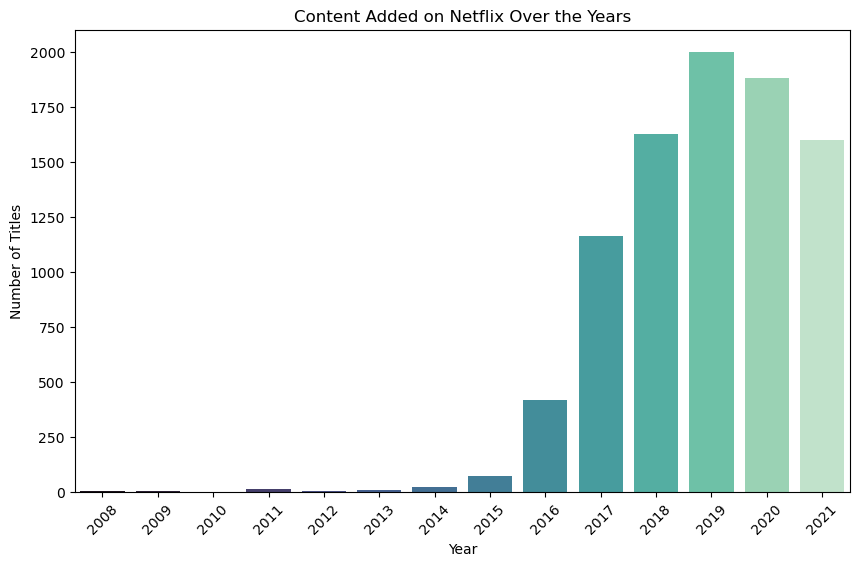

In [58]:
## ---Figure 8 ---
# Count plot to find the Content added on Netflix 

#Extract the year
df['year_added'] = df['date_added'].dt.year

# Plot content added over the years
plt.figure(figsize=(10,6))
sns.countplot(x='year_added', data=df, palette='mako', order=sorted(df['year_added'].dropna().unique()))
plt.title('Content Added on Netflix Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

📊 Insights:
- Significant content growth from 2016 to 2019, reflecting Netflix's aggressive expansion strategy.
- Slight decline after 2019, possibly due to the pandemic or strategic content shifts.
- 2018 and 2019 were peak years for new content releases, indicating a focus on building a vast content library.

💡 Recommendations:
- Analyze the content performance from peak years to identify the most successful genres and formats.
- Evaluate competitor strategies to maintain competitive growth.
- Explore collaborations with regional creators to increase localized content, especially in underserved market

type column

In [59]:
# Get value countes for 'type' column (Movies vs TV Shows)
freq = df.type.value_counts()
print(freq)

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


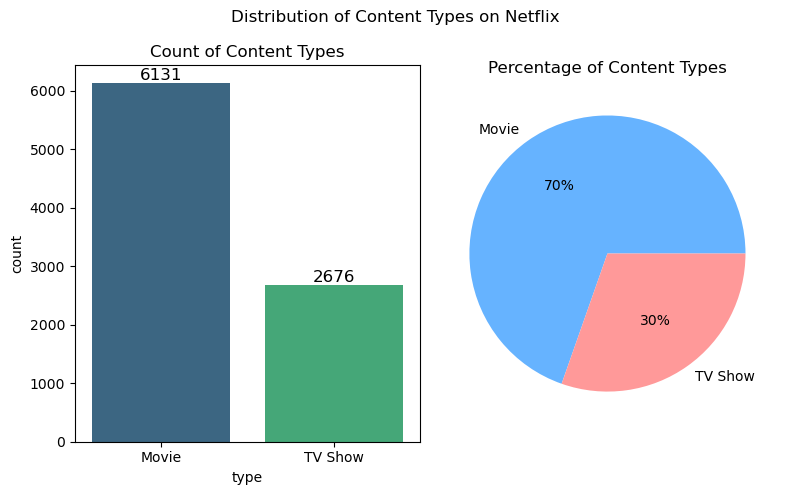

In [60]:
## ---Figure 9 ---
# Count and Pie plot to find the distribution of Content Types on Netflix

# Create a figure with two subplots
fig, axes=plt.subplots(1,2, figsize=(8, 5))

# Plot 1: Countplot using Seaborn
sns.countplot(data=df, x='type', ax=axes[0], palette='viridis')
axes[0].set_title('Count of Content Types')

# Display actual count values on top of bars
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

# Plot 2: Pie chart using Matplotlib
axes[1].pie(freq, labels=freq.index, autopct='%.0f%%', colors=['#66b3ff', '#ff9999'])
axes[1].set_title('Percentage of Content Types')

# Add a main title to the figure
plt.suptitle('Distribution of Content Types on Netflix')
plt.tight_layout()
plt.show()

📊 Insights:
- 70% of the content on Netflix consists of Movies, while 30% are TV Shows.
- Movies dominate the platform, indicating a greater investment in feature-length productions.
- TV Shows contribute a significant portion, likely driven by the rise of binge-watching culture.

💡 Recommendations:
- Increase TV Show investments in popular genres to retain long-term subscribers.
- Expand localized content in TV show formats to cater to regional preferences.
- Analyze user engagement to determine whether increasing episodic content or movie releases would enhance retention.

### Movies VS TVShows

In [61]:
# Display the first 5 titles from the dataset
print("First 5 titles in Dataset: ")
print(df['title'].head())

First 5 titles in Dataset: 
0     Dick Johnson Is Dead
1            Blood & Water
2                Ganglands
3    Jailbirds New Orleans
4             Kota Factory
Name: title, dtype: object


In [62]:
# Separate the dataset into Movies and TV Shows
movies_df = df.loc[(df['type']=="Movie")]

print("First 2 Movies: ")
movies_df.head(2)

First 2 Movies: 


show_id   type                             title  \
0      s1  Movie              Dick Johnson Is Dead   
6      s7  Movie  My Little Pony: A New Generation   

                        director  \
0                Kirsten Johnson   
6  Robert Cullen, José Luis Ucha   

                                                cast        country  \
0                                        Unavailable  United States   
6  Vanessa Hudgens, Kimiko Glenn, James Marsden, ...        Unknown   

  date_added  release_year rating duration              listed_in  \
0 2021-09-25          2020  PG-13   90 min          Documentaries   
6 2021-09-24          2021     PG   91 min  Children&FamilyMovies   

                                         description  year_added  
0  As her father nears the end of his life, filmm...        2021  
6  Equestria's divided. But a bright-eyed hero be...        2021

In [63]:
show_df = df.loc[(df['type']=="TV Show")]

print("First 2 TV Shows: ")
show_df.head(2)

First 2 TV Shows: 


show_id     type          title         director  \
1      s2  TV Show  Blood & Water      Unavailable   
2      s3  TV Show      Ganglands  Julien Leclercq   

                                                cast       country date_added  \
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...  South Africa 2021-09-24   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...       Unknown 2021-09-24   

   release_year rating   duration  \
1          2021  TV-MA  2 Seasons   
2          2021  TV-MA   1 Season   

                                           listed_in  \
1          InternationalTVShows,TVDramas,TVMysteries   
2  CrimeTVShows,InternationalTVShows,TVAction&Adv...   

                                         description  year_added  
1  After crossing paths at a party, a Cape Town t...        2021  
2  To protect his family from a powerful drug lor...        2021

#### Movies_df

In [64]:
# Clean the 'duration' column by removing 'min' and converting to integer
movies_df['duration'] = movies_df['duration'].str.replace('min', '').astype('int64')

In [65]:
# Confirm data type conversion
print("Data Type of 'duration':", movies_df['duration'].dtype)

Data Type of 'duration': int64


In [66]:
# Display the first 2 rows to verify changes
print("\nFirst 2 Movies After Cleaning:")
movies_df.head(2)


First 2 Movies After Cleaning:


show_id   type                             title  \
0      s1  Movie              Dick Johnson Is Dead   
6      s7  Movie  My Little Pony: A New Generation   

                        director  \
0                Kirsten Johnson   
6  Robert Cullen, José Luis Ucha   

                                                cast        country  \
0                                        Unavailable  United States   
6  Vanessa Hudgens, Kimiko Glenn, James Marsden, ...        Unknown   

  date_added  release_year rating  duration              listed_in  \
0 2021-09-25          2020  PG-13        90          Documentaries   
6 2021-09-24          2021     PG        91  Children&FamilyMovies   

                                         description  year_added  
0  As her father nears the end of his life, filmm...        2021  
6  Equestria's divided. But a bright-eyed hero be...        2021

In [67]:
# Summary statistics for numerical analysis
print("\nSummary Statistics for Movies DataFrame:")
movies_df.describe()


Summary Statistics for Movies DataFrame:


date_added  release_year     duration   year_added
count                           6131   6131.000000  6131.000000  6131.000000
mean   2019-05-07 03:32:47.639863040   2013.121514    99.564998  2018.849290
min              2008-01-01 00:00:00   1942.000000     3.000000  2008.000000
25%              2018-04-01 00:00:00   2012.000000    87.000000  2018.000000
50%              2019-06-19 00:00:00   2016.000000    98.000000  2019.000000
75%              2020-07-23 12:00:00   2018.000000   114.000000  2020.000000
max              2021-09-25 00:00:00   2021.000000   312.000000  2021.000000
std                              NaN      9.678169    28.289504     1.561922

In [68]:
# Identify the shortest movies
shortest_movie=movies_df.loc[(movies_df['duration']==np.min(movies_df.duration))]

print("Shortest Movie(s): ")
shortest_movie

Shortest Movie(s): 


show_id   type   title                           director         cast  \
3777   s3778  Movie  Silent  Limbert Fabian, Brandon Oldenburg  Unavailable   

            country date_added  release_year rating  duration  \
3777  United States 2019-06-04          2014   TV-Y         3   

                                 listed_in  \
3777  Children&FamilyMovies,Sci-Fi&Fantasy   

                                            description  year_added  
3777  "Silent" is an animated short film created by ...        2019

In [69]:
# Identify the Longest Movie
longest_movie = movies_df.loc[(movies_df['duration']==np.max(movies_df.duration))]

print("Longest Movie(s): ")
longest_movie

Longest Movie(s): 


show_id   type                       title     director  \
4253   s4254  Movie  Black Mirror: Bandersnatch  Unavailable   

                                                   cast        country  \
4253  Fionn Whitehead, Will Poulter, Craig Parkinson...  United States   

     date_added  release_year rating  duration  \
4253 2018-12-28          2018  TV-MA       312   

                                      listed_in  \
4253  Dramas,InternationalMovies,Sci-Fi&Fantasy   

                                            description  year_added  
4253  In 1984, a young programmer begins to question...        2018

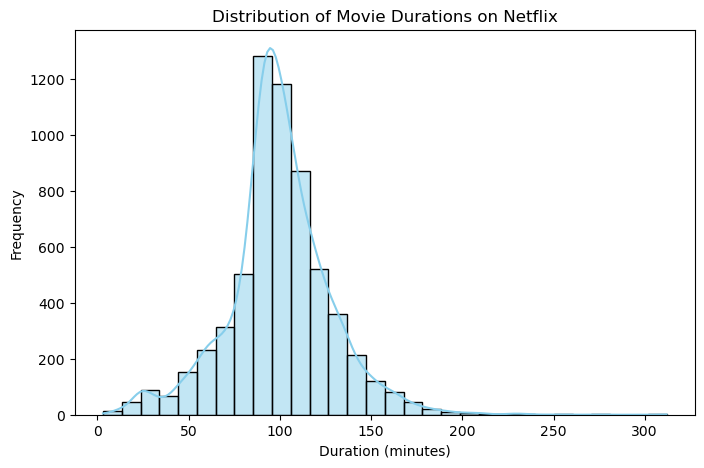

In [70]:
## ---Figure 10 ---
# Histplot to find the distribution of Movie Durations on Netflix

plt.figure(figsize=(8,5))
sns.histplot(movies_df['duration'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


📊 Insights:
- Most movies have a duration between 80 to 120 minutes, indicating a preference for standard feature-length content.
- A few outliers extend beyond 200 minutes, possibly special events, documentaries, or epic movies.
- The peak at around 100 minutes aligns with typical user viewing preferences and industry standards.

💡 Recommendations:
- Continue producing movies within the 90-120 minute range, which aligns with user preferences.
- Analyze user engagement on longer movies to determine retention rates and optimize release strategies.
- Consider segmenting longer content into limited series or episodes to increase viewership.

In [71]:
top_movie_countries = movies_df['country'].value_counts().head(10)

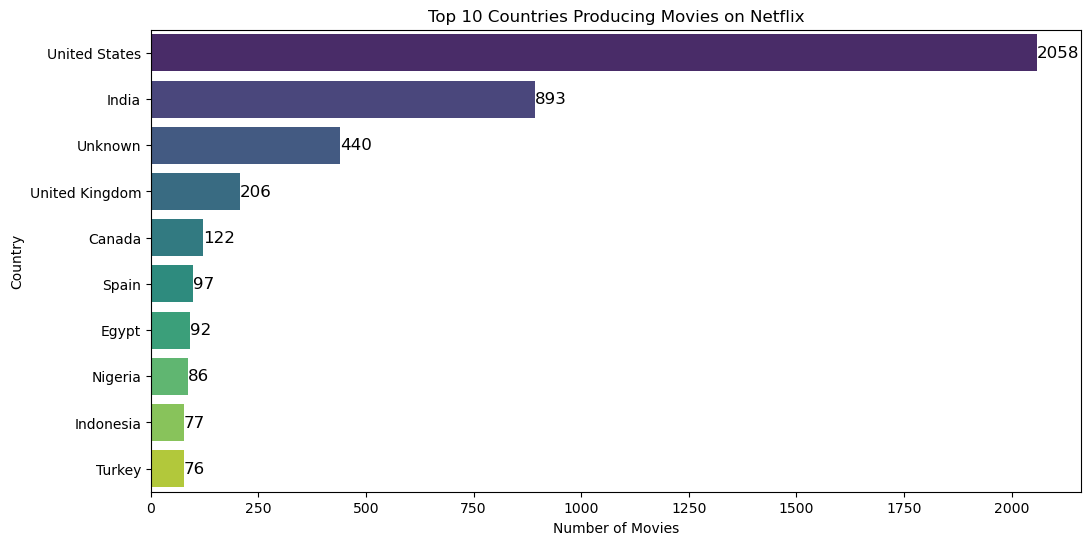

In [72]:
## ---Figure 11---
# Barplot to find the Top 10 countries producing movies on Netflix
plt.figure(figsize=(12,6))
ax = sns.barplot(x=top_movie_countries.values, y=top_movie_countries.index, palette='viridis')
plt.title('Top 10 Countries Producing Movies on Netflix')
plt.xlabel('Number of Movies')
plt.ylabel('Country')

for i, value in enumerate(top_movie_countries.values):
    ax.text(value, i, str(value), ha='left', va='center', fontsize=12, color='black')

plt.show()

📊 Insights:
- United States dominates movie production with over 2000 movies, followed by India with 893 movies.
- India’s strong presence highlights its robust film industry and growing global influence.
- Unknown category suggests missing or inconsistent data, which could impact regional analysis.

💡 Recommendations:
- Expand partnerships in emerging markets like India, Nigeria, and Indonesia to diversify the content portfolio.
- Invest in regional productions to attract localized audiences and strengthen regional viewership.
- Improve data management to reduce the number of movies categorized as Unknown for more accurate insights.

#### Shows_df

In [73]:
# Display unique values in 'duration' column
print("Unique Durations in TV Shows:")
print(show_df['duration'].unique())

Unique Durations in TV Shows:
['2 Seasons' '1 Season' '9 Seasons' '4 Seasons' '5 Seasons' '3 Seasons'
 '6 Seasons' '7 Seasons' '10 Seasons' '8 Seasons' '17 Seasons'
 '13 Seasons' '15 Seasons' '12 Seasons' '11 Seasons']


In [74]:
# Clean and Standardize the 'duration' column for TV Shows
show_df['duration'] = show_df['duration'].str.replace(" Seasons", "").str.replace(" Season", "").astype('int64')

In [75]:
# Verify Changes
print("\nCleaned Data Sample:")
show_df.head(2)


Cleaned Data Sample:


show_id     type          title         director  \
1      s2  TV Show  Blood & Water      Unavailable   
2      s3  TV Show      Ganglands  Julien Leclercq   

                                                cast       country date_added  \
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...  South Africa 2021-09-24   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...       Unknown 2021-09-24   

   release_year rating  duration  \
1          2021  TV-MA         2   
2          2021  TV-MA         1   

                                           listed_in  \
1          InternationalTVShows,TVDramas,TVMysteries   
2  CrimeTVShows,InternationalTVShows,TVAction&Adv...   

                                         description  year_added  
1  After crossing paths at a party, a Cape Town t...        2021  
2  To protect his family from a powerful drug lor...        2021

In [76]:
# Confirm Data Type
print("\nData Type of 'duration':", show_df['duration'].dtype)


Data Type of 'duration': int64


In [77]:
#  Summary Statistics for TV Show Duration
print("\nSummary Statistics for TV Show Durations:")
show_df['duration'].describe()


Summary Statistics for TV Show Durations:


count    2676.000000
mean        1.764948
std         1.582752
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: duration, dtype: float64

In [78]:
# Display the Longest TV Show(s)
longest_shows = show_df.loc[show_df['duration'] == np.max(show_df['duration'])]
print("\nLongest TV Show(s):")
longest_shows


Longest TV Show(s):


show_id     type           title     director  \
548    s549  TV Show  Grey's Anatomy  Unavailable   

                                                  cast        country  \
548  Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...  United States   

    date_added  release_year rating  duration                 listed_in  \
548 2021-07-03          2020  TV-14        17  RomanticTVShows,TVDramas   

                                           description  year_added  
548  Intern (and eventual resident) Meredith Grey f...        2021

In [79]:
# Display the Shortest TV Show(s)
shortest_shows = show_df.loc[show_df['duration'] == np.min(show_df['duration'])]
print("Shortest TV Show(s):")
shortest_shows

Shortest TV Show(s):


show_id     type                                title           director  \
2         s3  TV Show                            Ganglands    Julien Leclercq   
3         s4  TV Show                Jailbirds New Orleans        Unavailable   
5         s6  TV Show                        Midnight Mass      Mike Flanagan   
10       s11  TV Show  Vendetta: Truth, Lies and The Mafia        Unavailable   
11       s12  TV Show                     Bangkok Breaking  Kongkiat Komesiri   
...      ...      ...                                  ...                ...   
8775   s8776  TV Show                      Yeh Meri Family        Unavailable   
8780   s8781  TV Show                         Yo-Kai Watch        Unavailable   
8783   s8784  TV Show                                 Yoko        Unavailable   
8785   s8786  TV Show                                  YOM        Unavailable   
8800   s8801  TV Show                   Zindagi Gulzar Hai        Unavailable   

                                                   cast        country  \
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                           Unavailable        Unknown   
5     Kate Siegel, Zach Gilford, Hamish Linklater, H...        Unknown   
10                                          Unavailable        Unknown   
11    Sukollawat Kanarot, Sushar Manaying, Pavarit M...        Unknown   
...                                                 ...            ...   
8775  Vishesh Bansal, Mona Singh, Akarsh Khurana, Ah...          India   
8780  Johnny Yong Bosch, J.W. Terry, Alicyn Packard,...  United States   
8783  Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...        Unknown   
8785  Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...        Unknown   
8800  Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...       Pakistan   

     date_added  release_year rating  duration  \
2    2021-09-24          2021  TV-MA         1   
3    2021-09-24          2021  TV-MA         1   
5    2021-09-24          2021  TV-MA         1   
10   2021-09-24          2021  TV-MA         1   
11   2021-09-23          2021  TV-MA         1   
...         ...           ...    ...       ...   
8775 2018-08-31          2018  TV-PG         1   
8780 2016-04-01          2015  TV-Y7         1   
8783 2018-06-23          2016   TV-Y         1   
8785 2018-06-07          2016  TV-Y7         1   
8800 2016-12-15          2012  TV-PG         1   

                                              listed_in  \
2     CrimeTVShows,InternationalTVShows,TVAction&Adv...   
3                                  Docuseries,RealityTV   
5                         TVDramas,TVHorror,TVMysteries   
10         CrimeTVShows,Docuseries,InternationalTVShows   
11    CrimeTVShows,InternationalTVShows,TVAction&Adv...   
...                                                 ...   
8775                    InternationalTVShows,TVComedies   
8780                                AnimeSeries,Kids'TV   
8783                                            Kids'TV   
8785                                            Kids'TV   
8800      InternationalTVShows,RomanticTVShows,TVDramas   

                                            description  year_added  
2     To protect his family from a powerful drug lor...        2021  
3     Feuds, flirtations and toilet talk go down amo...        2021  
5     The arrival of a charismatic young priest brin...        2021  
10    Sicily boasts a bold "Anti-Mafia" coalition. B...        2021  
11    Struggling to earn a living in Bangkok, a man ...        2021  
...                                                 ...         ...  
8775  In the summer of 1998, middle child Harshu bal...        2018  
8780  Nate frees a mythical being trapped in a magic...        2016  
8783  Friends Mai, Oto and Vik's games at the park b...        2018  
8785  With the mind of a human being, and the body o...        2018  
8800  Strong-willed, middle-class Kashaf and carefre...        

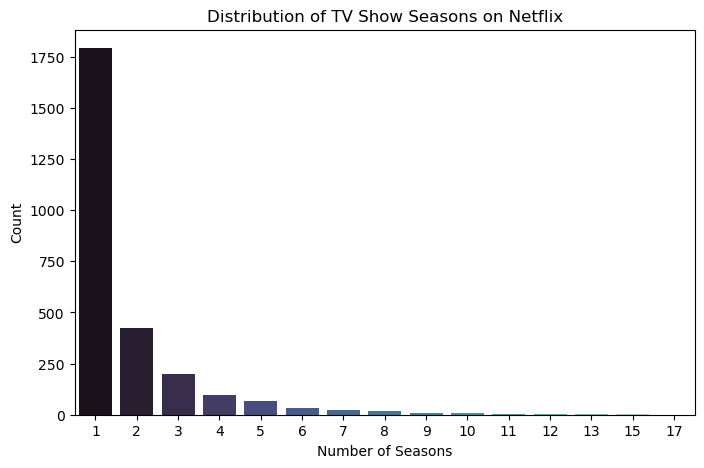

In [80]:
## ---Figure 12 ---
# Count plot to find the distribution of TV Show Seasons on Netflix
plt.figure(figsize=(8,5))
sns.countplot(x='duration', data=show_df, palette='mako')
plt.title('Distribution of TV Show Seasons on Netflix')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()


📊 Insights:
- Single-season shows dominate, indicating a focus on limited series or experimental content.
- The significant drop in shows with multiple seasons suggests challenges in audience retention or renewal.
- Long-running series with over 10 seasons are rare, reflecting selective investment in extended productions.

💡 Recommendations:
- Invest in successful multi-season series by analyzing engagement data to identify popular genres.
- Promote limited series through targeted marketing to maximize viewership during their short run.
- Monitor completion rates to make informed renewal decisions and improve content longevity.

In [81]:
top_tv_countries = show_df['country'].value_counts().head(10)

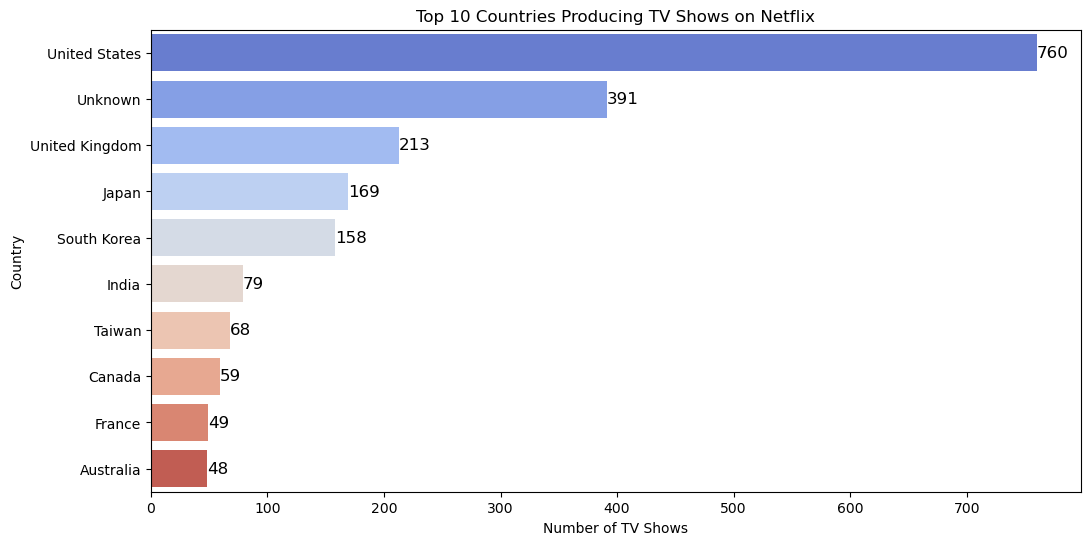

In [82]:
## ---Figure 13 ---
# Barplot to find the Top 10 Countries Producing TV Shows on Netflix

plt.figure(figsize=(12,6))
ax = sns.barplot(x=top_tv_countries.values, y=top_tv_countries.index, palette='coolwarm')
plt.title('Top 10 Countries Producing TV Shows on Netflix')
plt.xlabel('Number of TV Shows')
plt.ylabel('Country')

for i, value in enumerate(top_tv_countries.values):
    ax.text(value, i, str(value), ha='left', va='center', fontsize=12, color='black')

plt.show()

📊 Insights:
- The United States leads in TV show production, with 760 titles, reflecting its dominance in the global entertainment industry.
- A significant number of shows are categorized as "Unknown" (391), indicating gaps in metadata that Netflix could address.
- United Kingdom, Japan, and South Korea contribute a large number of titles, reflecting their strong cultural exports in media and entertainment.
- India has a growing presence with 79 shows, suggesting an increasing demand for regional and localized content.

💡 Recommendations:
- Enhance metadata accuracy to reduce the number of unknown country attributions.
- Invest in regional production in emerging markets like India, South Korea, and Japan to diversify content.
- Leverage partnerships with leading production companies in these regions to capture local audiences and expand Netflix’s global footprint.

### 2.5 Bivariate Analysis

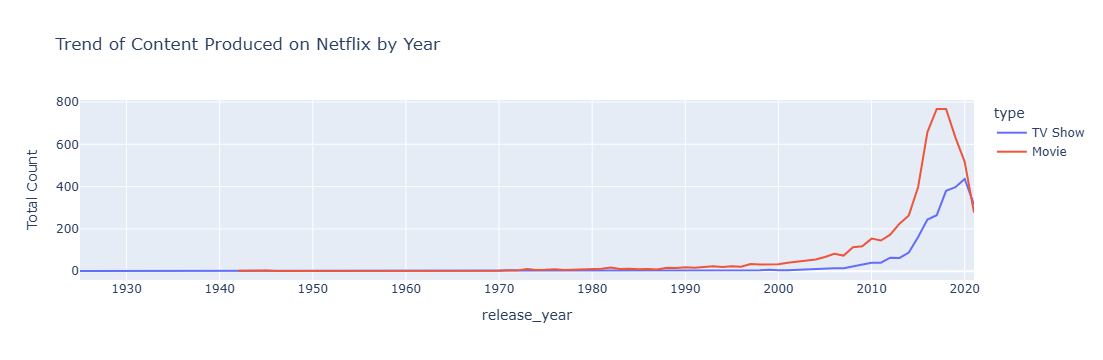

In [83]:
## --- 1. Trend Analysis of Netflix Content Production ---
# Yearly Trend of Movies and TV Shows on Netflix

# Grouping data by release year and content type to get the count of each type per year
df2 = df.groupby(['release_year', 'type']).size().reset_index(name='Total Count')

# Plotting a line graph using Plotly to visualize the trend
graph = px.line(
    df2, 
    x='release_year', 
    y='Total Count', 
    color='type', 
    title='Trend of Content Produced on Netflix by Year'
)

# Display the graph
graph.show()

📊 Insights:
- There is a significant increase in content production from 2015 to 2020.
Movies have consistently led in production volume, peaking sharply around 2019.
- TV Shows also experienced rapid growth, especially from 2017 onwards, indicating Netflix's push towards serial content.
- A notable drop in both movies and TV shows after 2020 might be attributed to the impact of the COVID-19 pandemic.
- Content production was minimal before the 2000s, but with the rise of streaming platforms, the numbers surged.

💡 Recommendations:
- Continue investing in original content production, focusing on both movies and TV shows to maintain user engagement.
- Diversify content by exploring different genres and regional storytelling to appeal to global audiences.
- Use this trend analysis to predict future content demand and allocate resources efficiently.

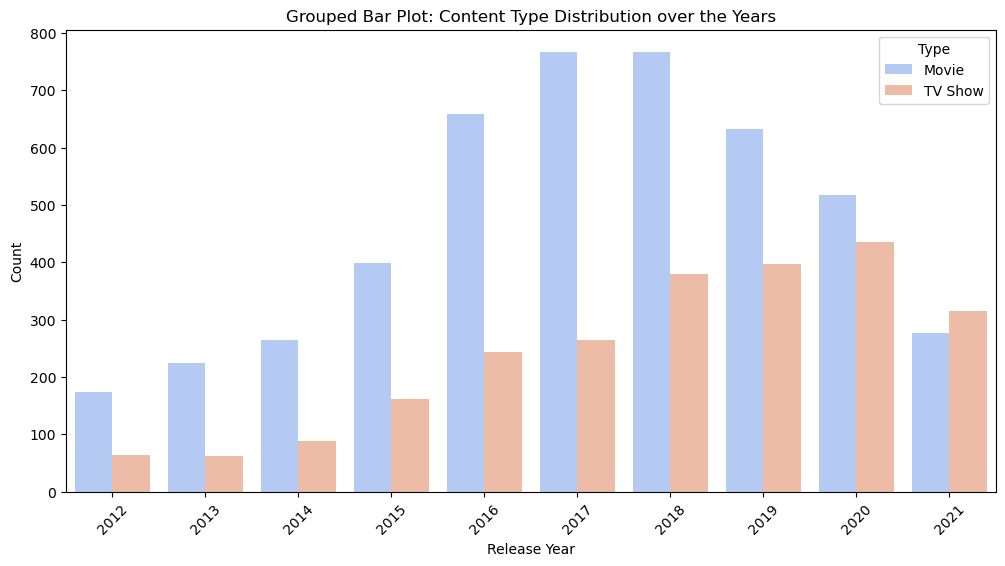

In [84]:
## --- 2. Grouped Bar Plot (Multivariate) ---
# Count of Movies & TV Shows across different Ratings and Years
top_years = df['release_year'].value_counts().index[:10]  # Selecting top 10 years
df_top_years = df[df['release_year'].isin(top_years)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_years, x='release_year', hue='type', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Grouped Bar Plot: Content Type Distribution over the Years")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.legend(title="Type")
plt.show()

📊 Insights:
- Movies consistently outnumber TV Shows each year, indicating Netflix’s preference for movie production.
- A significant increase in both movies and TV shows occurred between 2016 to 2018, reaching a peak in 2017 and 2018.
- 2019 and 2020 show a shift towards TV shows, with the gap between movies and TV shows narrowing.
- In 2021, there was a noticeable decline in movies while TV shows remained relatively stable, possibly due to changes in production strategies or the lasting impact of the pandemic.

💡 Recommendations:
- Continue balancing content production with a focus on both movies and TV shows to meet the varied preferences of viewers.
- Evaluate the reason for the decline in movies after 2020 and consider new genres or regional content to boost production.
- Leverage the popularity of TV shows to create binge-worthy content and retain subscribers.

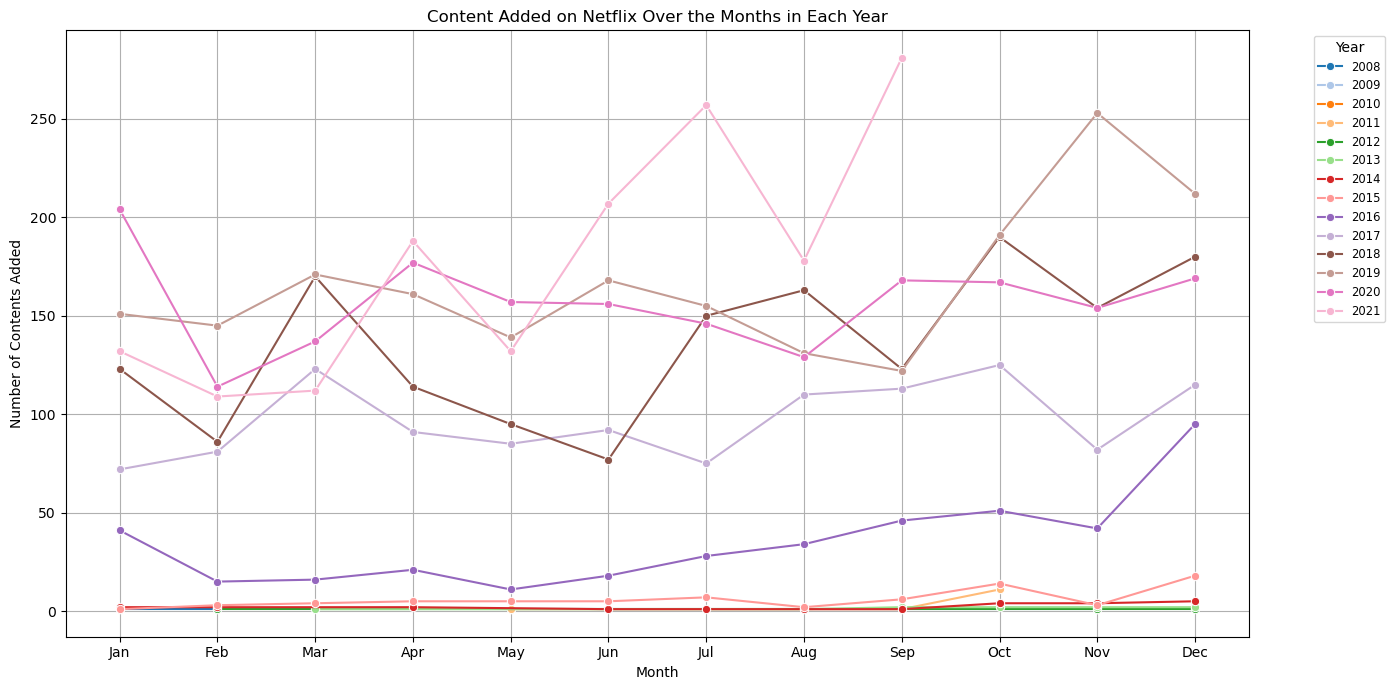

In [85]:
## --- 3. Monthly Content Addition Analysis ---
# Trend of Content Added on Netflix Over the Months for Each Year

# Convert 'date_added' to datetime format if not already
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract Year and Month from 'date_added'
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month

# Group by Year and Month to count the content added
monthly_content = df.groupby(['year', 'month']).size().reset_index(name='Total Content')

# Plot the data using seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(x='month', y='Total Content', hue='year', data=monthly_content, palette='tab20', marker='o')

# Customize the plot
plt.title('Content Added on Netflix Over the Months in Each Year')
plt.xlabel('Month')
plt.ylabel('Number of Contents Added')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


📊 Insights:
- Seasonal Trends: Spikes in content additions are noticeable in July and December, likely to capture audience interest during holidays.
- Growth Over Time: Significant growth from 2016 to 2021, with a sharp rise in 2020 due to increased demand during the pandemic.
- December Peak: Most years see a content surge in December for holiday season viewership.

💡 Recommendations:
- Continue leveraging seasonal release strategies.
- Analyze user engagement during July and December for targeted marketing.
- Add diverse content in off-peak months to maintain user retention.

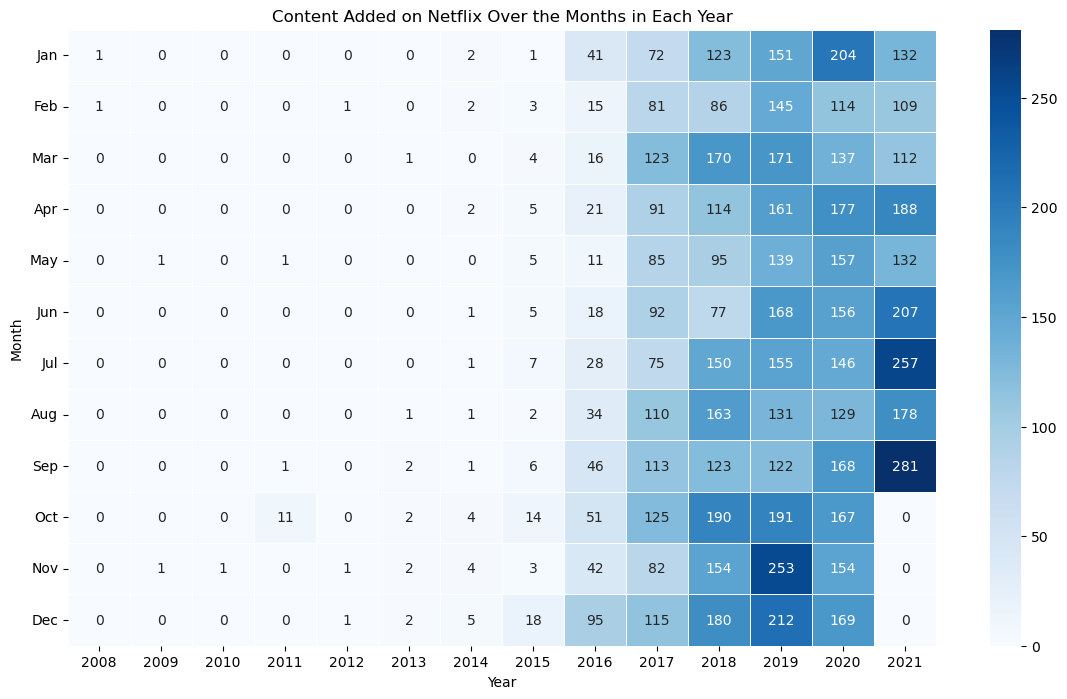

In [86]:
## --- 4. Heatmap Visualization for Content Addition Trend ---
# Analyzing Monthly Trends of Content Added on Netflix Over the Years

# Convert 'date_added' to datetime if not already done
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year and month
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month

# Group by year and month to get the count of content added
monthly_content = df.groupby(['year', 'month']).size().reset_index(name='Total Content')

# Create a pivot table for heatmap
heatmap_data = monthly_content.pivot_table(index='month', columns='year', values='Total Content', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(14,8))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='Blues', linewidths=0.5)

# Customize the plot
plt.title('Content Added on Netflix Over the Months in Each Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.yticks(np.arange(12) + 0.5, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.show()


📊 Insights from the Heatmap:
- Peak Months: September, July, and December had the highest content additions, especially in 2020.
- Growth Trend: Significant content growth began after 2016, peaking between 2018-2020.
- Seasonal Pattern: More content was added in the last quarter, likely targeting holiday viewers.

💡 Recommendations:
- Maximize marketing and promotion around September and December.
- Consider maintaining high-quality content releases throughout the year to avoid stagnation.
- Analyze user retention during peak months to optimize future content releases.

In [87]:
## --- 5. Sentiment Analysis of Netflix Content Descriptions ---
# Trend of Sentiment in Netflix Titles Over the Years

# Select and rename necessary columns
df3 = df[['release_year','description']]
df3 = df3.rename(columns = {'release_year': 'Release Year', 'description':'Description'})

# Perform sentiment analysis using TextBlob in an efficient manner
def analyze_sentiment(text):
    polarity = TextBlob(str(text)).sentiment.polarity
    if polarity == 0:
        return 'Neutral'
    elif polarity > 0:
        return 'Positive'
    else:
        return 'Negative'

df3['Sentiment'] = df3['Description'].apply(analyze_sentiment)

# Group by release year and sentiment
df3 = df3.groupby(['Release Year', 'Sentiment']).size().reset_index(name='Total Count')

# Filter for recent data
df3 = df3[df3['Release Year'] > 2005]

# Plot using Plotly
bargraph = px.bar(df3, x="Release Year", y="Total Count", color="Sentiment", 
                   title="Sentiment Analysis of Netflix Content", 
                   labels={'Release Year': 'Year', 'Total Count': 'Number of Titles'})
bargraph.show()

📊 Insights
- Positive Sentiment Dominance: The majority of Netflix content received positive sentiment, with a visible increase after 2015.
- Growth in Content: Content production surged significantly from 2015 to 2020, followed by a slight decline.
- Balanced Distribution: While negative and neutral sentiment titles also grew, they remained relatively smaller compared to positive sentiment titles.

### 2.6 Multivariate Analysis

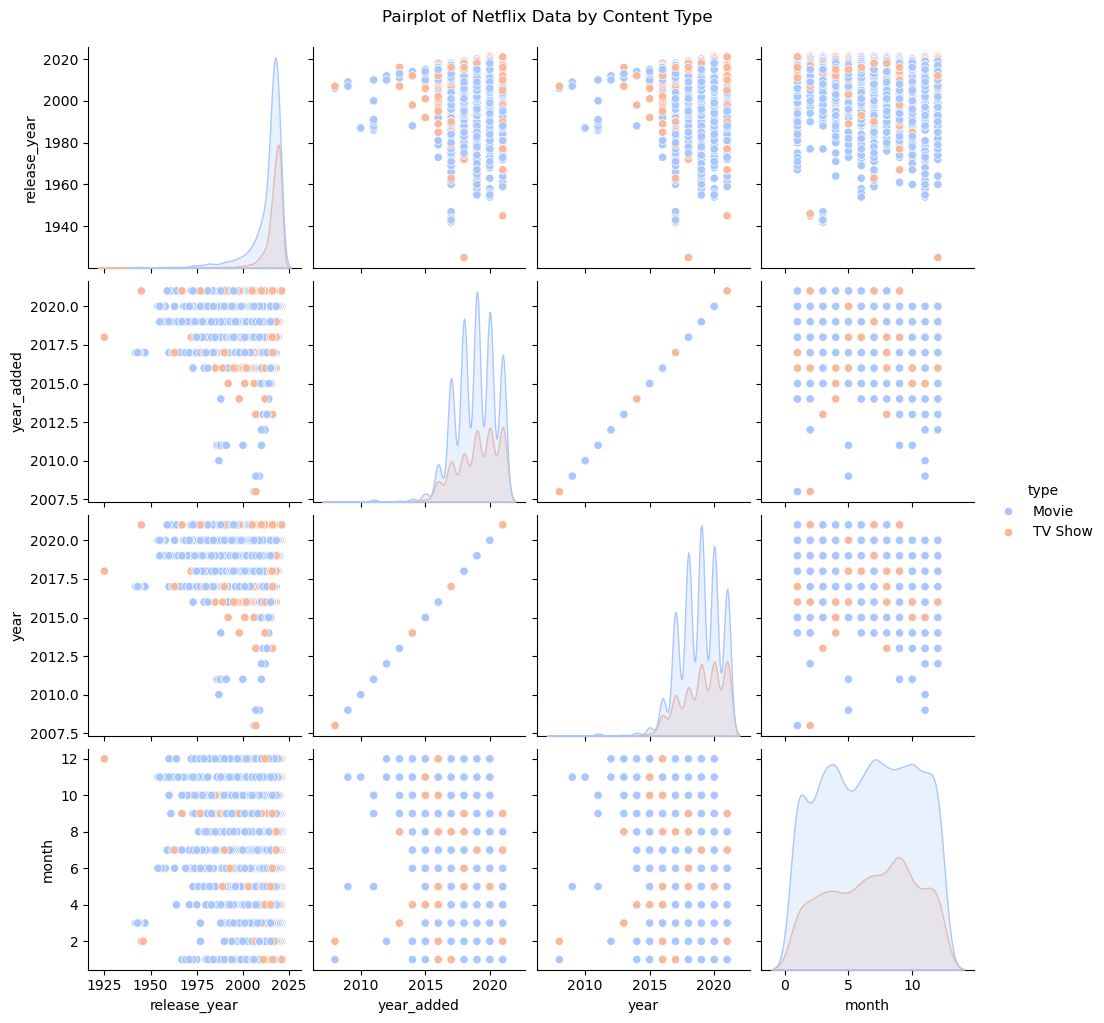

In [88]:
## --- 1. Pairplot (Multivariate) ---
# This helps in understanding relationships between numerical variables
sns.pairplot(df, hue='type', diag_kind='kde', palette='coolwarm')
plt.suptitle("Pairplot of Netflix Data by Content Type", y=1.02)
plt.show()

📊 Insights
- Movies vs. TV Shows: Movies (blue) are more frequent compared to TV shows (orange).
- Recent Growth: Content production has increased significantly since 2015, with more movies added compared to TV shows.
- Monthly Patterns: Content is consistently added throughout the year, with slight spikes during specific months.
- Release vs. Addition: Most content is added to Netflix within a few years of its release, with many older movies added post-2015.

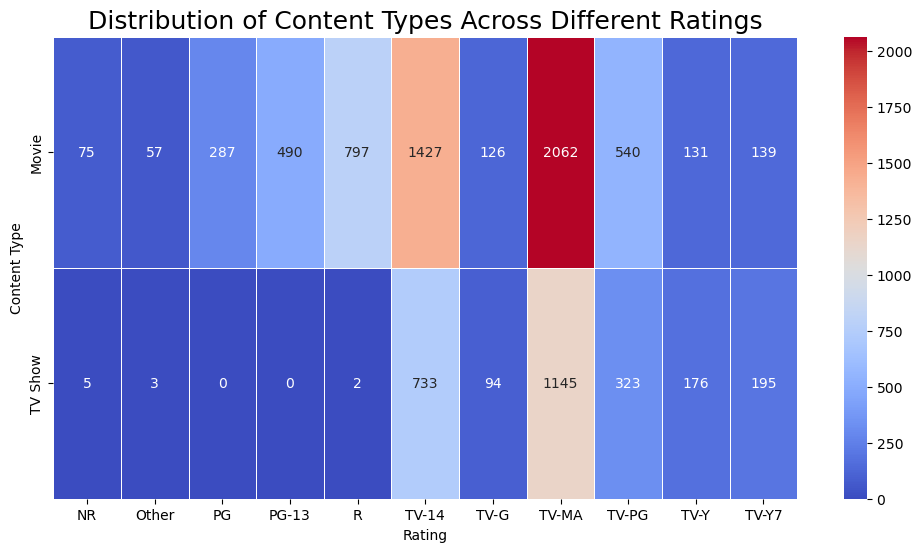

In [89]:
## --- 2. Heatmap (Multivariate) ---
# Analyzing the Relationship Between Content Type and Rating

# Create a cross-tabulation to analyze the relationship between 'type' and 'rating'
crosstab = pd.crosstab(df['type'], df['rating'])

# Plot the heatmap to visualize the relationship
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
sns.heatmap(crosstab, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5)

# Add informative title and labels
plt.title('Distribution of Content Types Across Different Ratings', fontsize=18)
plt.xlabel('Rating')
plt.ylabel('Content Type')

# Display the plot
plt.show()

📊 Insights
- Dominance of TV-MA Rating: Both movies and TV shows have the highest count under the TV-MA (Mature Audience) rating.
- Family-Friendly Ratings: TV shows have more content in the TV-Y, TV-Y7, and TV-G categories, indicating children's and family-oriented programming.
- Movies Across Ratings: Movies are more distributed across a variety of ratings, including PG, PG-13, and R, reflecting a diverse audience base.
- Limited PG-13 Content: TV shows have minimal to no presence in PG-13, while movies dominate in this rating.
- NR and Other Ratings: There is a relatively small number of unrated (NR) or “Other” rated content.

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8807 non-null   int32         
 13  year          8807 non-null   int32         
 14  month         8807 non-null   int32         
dtypes: datetime64[ns](1), int32(3), int64(

## Step 3. Conclusion

- Comprehensive Insights: The project offered detailed insights into Netflix's content landscape, analyzing trends in production, country-wise contributions, and content preferences.

- Growth Analysis: A significant surge in content production was observed post-2015, with the US and India leading in content creation.

- Content Preferences: Movies outnumbered TV shows, with a preference for single-season series. Sentiment analysis indicated a predominantly positive reception.

- Rating Distribution: TV-MA dominated ratings, reflecting mature content focus, while TV shows had notable representation in family-friendly categories.

- Business Recommendations: Netflix can explore further content diversification, enhance global reach, and expand multi-season TV shows for better user retention.

- Future Scope: Extending the analysis with user engagement data and predictive modeling could provide deeper insights for strategic decision-making.

- Final Thoughts: This project demonstrated strong data analysis, visualization, and storytelling skills, reflecting my ability to derive actionable insights for business impact.

## Let's solve some Questions on Netflix Dataset

### Q. 1. For 'House of Cards', What is the show id and Who is the director of the show??

#### isin()

In [91]:
df[df['title'].isin(['House of Cards'])]

show_id     type           title     director  \
1059   s1060  TV Show  House of Cards  Unavailable   

                                                   cast        country  \
1059  Kevin Spacey, Robin Wright, Kate Mara, Corey S...  United States   

     date_added  release_year rating   duration             listed_in  \
1059 2021-04-14          2018  TV-MA  6 Seasons  TVDramas,TVThrillers   

                                            description  year_added  year  \
1059  A ruthless politician will stop at nothing to ...        2021  2021   

      month  
1059      4

#### Q. 2. In which year, The highest no.of TV Shows & Movies were released? (Show in bar graph)

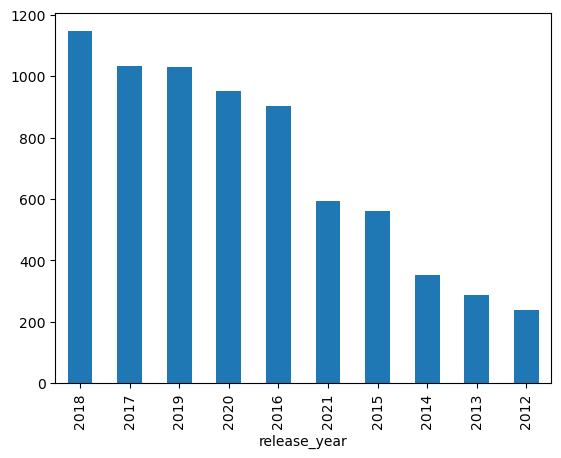

In [92]:
year_vc= df.release_year.value_counts().head(10)
year_vc.plot(kind = 'bar')
plt.show()

#### Q. 3. Show all the Movies that were released in the year 2020

In [93]:
df[ (df['type'] == 'Movie') & (df['release_year']==2020) ].head()

show_id   type                                              title  \
0        s1  Movie                               Dick Johnson Is Dead   
16      s17  Movie  Europe's Most Dangerous Man: Otto Skorzeny in ...   
78      s79  Movie                                     Tughlaq Durbar   
84      s85  Movie                               Omo Ghetto: the Saga   
103    s104  Movie                                     Shadow Parties   

                                          director  \
0                                  Kirsten Johnson   
16   Pedro de Echave García, Pablo Azorín Williams   
78                        Delhiprasad Deenadayalan   
84                      JJC Skillz, Funke Akindele   
103                                     Yemi Amodu   

                                                  cast        country  \
0                                          Unavailable  United States   
16                                         Unavailable        Unknown   
78          Vijay Sethupathi, Parthiban, Raashi Khanna        Unknown   
84   Funke Akindele, Ayo Makun, Chioma Chukwuka Akp...        Nigeria   
103  Jide Kosoko, Omotola Jalade-Ekeinde, Yemi Blaq...        Unknown   

    date_added  release_year rating duration  \
0   2021-09-25          2020  PG-13   90 min   
16  2021-09-22          2020  TV-MA   67 min   
78  2021-09-11          2020  TV-14  145 min   
84  2021-09-10          2020  TV-MA  147 min   
103 2021-09-06          2020  TV-MA  117 min   

                                listed_in  \
0                           Documentaries   
16      Documentaries,InternationalMovies   
78    Comedies,Dramas,InternationalMovies   
84       Action&Adventure,Comedies,Dramas   
103  Dramas,InternationalMovies,Thrillers   

                                           description  year_added  year  \
0    As her father nears the end of his life, filmm...        2021  2021   
16   Declassified documents reveal the post-WWII li...        2021  2021   
78   A budding politician has devious plans to rise...        2021  2021   
84   Twins are reunited as a good-hearted female ga...        2021  2021   
103  A family faces destruction in a long-running c...        2021  2021   

     month  
0        9  
16       9  
78       9  
84       9  
103      9

#### Q. 4 - Show only the Titles of all TV Shows that were released in India only.

In [94]:
df[ (df['type'] == 'Movie') & (df['country'] == 'India') ]['title']

24                      Jeans
105          Angamaly Diaries
114                    Anjaam
116                    Dhanak
118                   Gurgaon
                ...          
8772    Yamla Pagla Deewana 2
8773      Yanda Kartavya Aahe
8798                 Zed Plus
8799                    Zenda
8806                   Zubaan
Name: title, Length: 893, dtype: object

#### Q. 5 - Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom"

In [95]:
df[ (df['type'] == 'Movie') & (df['listed_in'] == 'Comedies') | (df['country'] == 'United Kingdom') ]

show_id     type                                   title  \
8         s9  TV Show           The Great British Baking Show   
27       s28    Movie                               Grown Ups   
32       s33  TV Show                           Sex Education   
65       s66  TV Show                            Numberblocks   
72       s73  TV Show  Jack Whitehall: Travels with My Father   
...      ...      ...                                     ...   
8740   s8741  TV Show                             Wild Alaska   
8741   s8742  TV Show                             Wild Arabia   
8744   s8745    Movie                                Williams   
8758   s8759  TV Show                  World's Busiest Cities   
8786   s8787    Movie                            You Can Tutu   

             director                                               cast  \
8     Andy Devonshire  Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
27       Dennis Dugan  Adam Sandler, Kevin James, Chris Rock, David S...   
32        Unavailable  Asa Butterfield, Gillian Anderson, Ncuti Gatwa...   
65        Unavailable  Beth Chalmers, David Holt, Marcel McCalla, Ter...   
72        Unavailable                  Jack Whitehall, Michael Whitehall   
...               ...                                                ...   
8740      Unavailable                                      Dougray Scott   
8741      Unavailable                                   Alexander Siddig   
8744  Morgan Matthews                                        Unavailable   
8758      Unavailable                 Anita Rani, Ade Adepitan, Dan Snow   
8786      James Brown  Lily O'Regan, Jeannettsy Enriquez Borges, Joel...   

             country date_added  release_year rating   duration  \
8     United Kingdom 2021-09-24          2021  TV-14  9 Seasons   
27     United States 2021-09-20          2010  PG-13    103 min   
32    United Kingdom 2021-09-17          2020  TV-MA  3 Seasons   
65    United Kingdom 2021-09-15          2021   TV-Y  6 Seasons   
72    United Kingdom 2021-09-14          2021  TV-MA  5 Seasons   
...              ...        ...           ...    ...        ...   
8740  United Kingdom 2017-03-31          2015  TV-PG   1 Season   
8741  United Kingdom 2017-03-31          2013  TV-PG   1 Season   
8744  United Kingdom 2017-11-04          2017  TV-MA    105 min   
8758  United Kingdom 2019-02-01          2017  TV-PG   1 Season   
8786  United Kingdom 2017-12-31          2017   TV-G     87 min   

                                           listed_in  \
8                           BritishTVShows,RealityTV   
27                                          Comedies   
32    BritishTVShows,InternationalTVShows,TVComedies   
65                                           Kids'TV   
72    BritishTVShows,Docuseries,InternationalTVShows   
...                                              ...   
8740      BritishTVShows,Docuseries,Science&NatureTV   
8741      BritishTVShows,Docuseries,Science&NatureTV   
8744  Documentaries,InternationalMovies,SportsMovies   
8758                       BritishTVShows,Docuseries   
8786                           Children&FamilyMovies   

                                            description  year_added  year  \
8     A talented batch of amateur bakers face off in...        2021  2021   
27    Mourning the loss of their beloved junior high...        2021  2021   
32    Insecure Otis has all the answers when it come...        2021  2021   
65    In a place called Numberland, math adds up to ...        2021  2021   
72    Jovial comic Jack Whitehall invites his stuffy...        2021  2021   
...                                                 ...         ...   ...   
8740  The natural bounty of Alaska sustains its dive...        2017  2017   
8741  The widely varied geology and dramatic landsca...        2017  2017   
8744  This inspiring documentary charts the birth of...        2017  2017   
8758  From Moscow to Mexico City, three BBC journali...        

#### Q. 6 - In how many movies/Shows, Tom Cruise was cast???

In [96]:
df[ df['cast'].str.contains('Tom Cruise')]

show_id   type     title              director  \
341     s342  Movie  Magnolia  Paul Thomas Anderson   
1254   s1255  Movie  Rain Man        Barry Levinson   

                                                   cast        country  \
341   John C. Reilly, Philip Baker Hall, Tom Cruise,...  United States   
1254  Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...  United States   

     date_added  release_year rating duration                 listed_in  \
341  2021-08-01          1999      R  189 min  Dramas,IndependentMovies   
1254 2021-03-01          1988      R  134 min      ClassicMovies,Dramas   

                                            description  year_added  year  \
341   Through chance, history and divine interventio...        2021  2021   
1254  Motivated by money, a selfish workaholic seeki...        2021  2021   

      month  
341       8  
1254      3

#### Q. 7 - What are the different Ratings defined by Netflix???

In [97]:
df.rating.nunique()

11

In [98]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'Other', 'NR'], dtype=object)

#### Q. 7.1 - How many Movies got the TV-14 rating in Canada???

In [99]:
df[ (df['type'] == 'Movie') & (df['rating'] =='TV-14') & (df['country'] == 'Canada') ].shape[0]

13

#### Q. 7.2 - How many TV Show got he 'R' rating after the year 2018???

In [100]:
df[ (df['type'] == "TV Show") & (df['rating'] == 'R') & (df['release_year'] > 2018) ].shape[0]

0

#### Q. 8.1 - What is the maximum duration of a Movie on Netflix???

In [101]:
movies_df.loc[(movies_df['duration']==np.max(movies_df.duration))]

show_id   type                       title     director  \
4253   s4254  Movie  Black Mirror: Bandersnatch  Unavailable   

                                                   cast        country  \
4253  Fionn Whitehead, Will Poulter, Craig Parkinson...  United States   

     date_added  release_year rating  duration  \
4253 2018-12-28          2018  TV-MA       312   

                                      listed_in  \
4253  Dramas,InternationalMovies,Sci-Fi&Fantasy   

                                            description  year_added  
4253  In 1984, a young programmer begins to question...        2018

#### Q. 8.2 - What is the maximum season of a show on Netflix

In [102]:
show_df.loc[(show_df['duration'] == np.max(show_df['duration']))]

show_id     type           title     director  \
548    s549  TV Show  Grey's Anatomy  Unavailable   

                                                  cast        country  \
548  Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...  United States   

    date_added  release_year rating  duration                 listed_in  \
548 2021-07-03          2020  TV-14        17  RomanticTVShows,TVDramas   

                                           description  year_added  
548  Intern (and eventual resident) Meredith Grey f...        2021

#### Q. 9 - Which country has the highest no.of TV Shows???

In [103]:
show_df.country.value_counts().head(1)

country
United States    760
Name: count, dtype: int64

#### Q. 10 - How can you sort the dataset by year???

In [104]:
df.sort_values(by = 'release_year', ascending = False)

show_id     type                                          title  \
693     s694    Movie                         Ali & Ratu Ratu Queens   
781     s782    Movie          Black Holes | The Edge of All We Know   
762     s763    Movie                                   Sweet & Sour   
763     s764  TV Show                                    Sweet Tooth   
764     s765    Movie                   Trippin' with the Kandasamys   
...      ...      ...                                            ...   
8660   s8661    Movie  Undercover: How to Operate Behind Enemy Lines   
8763   s8764    Movie                WWII: Report from the Aleutians   
8205   s8206    Movie                           The Battle of Midway   
7790   s7791    Movie                                 Prelude to War   
4250   s4251  TV Show              Pioneers: First Women Filmmakers*   

            director                                               cast  \
693   Lucky Kuswandi  Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...   
781    Peter Galison                                        Unavailable   
762    Lee Kae-byeok          Jang Ki-yong, Chae Soo-bin, Jung Soo-jung   
763      Unavailable  Nonso Anozie, Christian Convery, Adeel Akhtar,...   
764    Jayan Moodley  Jailoshini Naidoo, Maeshni Naicker, Madhushan ...   
...              ...                                                ...   
8660       John Ford                                        Unavailable   
8763     John Huston                                        Unavailable   
8205       John Ford                          Henry Fonda, Jane Darwell   
7790     Frank Capra                                        Unavailable   
4250     Unavailable                                        Unavailable   

            country date_added  release_year rating  duration  \
693         Unknown 2021-06-17          2021  TV-14   101 min   
781         Unknown 2021-06-02          2021  TV-14    99 min   
762     South Korea 2021-06-04          2021  TV-14   103 min   
763   United States 2021-06-04          2021  TV-14  1 Season   
764    South Africa 2021-06-04          2021  TV-14    94 min   
...             ...        ...           ...    ...       ...   
8660  United States 2017-03-31          1943  TV-PG    61 min   
8763  United States 2017-03-31          1943  TV-PG    45 min   
8205  United States 2017-03-31          1942  TV-14    18 min   
7790  United States 2017-03-31          1942  TV-14    52 min   
4250        Unknown 2018-12-30          1925  TV-14  1 Season   

                                         listed_in  \
693            Comedies,Dramas,InternationalMovies   
781                                  Documentaries   
762    Comedies,InternationalMovies,RomanticMovies   
763   TVAction&Adventure,TVDramas,TVSci-Fi&Fantasy   
764    Comedies,InternationalMovies,RomanticMovies   
...                                            ...   
8660                   ClassicMovies,Documentaries   
8763                                 Documentaries   
8205                   ClassicMovies,Documentaries   
7790                   ClassicMovies,Documentaries   
4250                                       TVShows   

                                            description  year_added  year  \
693   After his father's passing, a teenager sets ou...        2021  2021   
781   Follow scientists on their quest to understand...        2021  2021   
762   Faced with real-world opportunities and challe...        2021  2021   
763   On a perilous adventure across a post-apocalyp...        2021  2021   
764   To rekindle their marriages, best friends-turn...        2021  2021   
...                                                 ...         ...   ...   
8660  This World War II-era training film dramatizes...        2017  2017   
8763  Filmmaker John Huston narrates this Oscar-nomi...        2017  2017   
8205  Director John Ford captures combat footage of ...        2017  2017   
7790  Frank Capra's documentary chronic

#### Q. 11 - Find all the instances where: ( type is 'Movie' and linsted_in is 'Dramas') or ( type is 'TV Show' & listed_in is "Kids' TV" )

In [105]:
df[ (df['type'] =='Movie') & (df['listed_in'] == 'Dramas') ].head(2)

show_id   type               title         director  \
112    s113  Movie               Worth   Sara Colangelo   
129    s130  Movie  An Unfinished Life  Lasse Hallström   

                                                  cast  \
112  Michael Keaton, Stanley Tucci, Amy Ryan, Shuno...   
129  Robert Redford, Jennifer Lopez, Morgan Freeman...   

                    country date_added  release_year rating duration  \
112                 Unknown 2021-09-03          2021  PG-13  119 min   
129  Germany, United States 2021-09-01          2005  PG-13  108 min   

    listed_in                                        description  year_added  \
112    Dramas  In the wake of the Sept. 11 attacks, a lawyer ...        2021   
129    Dramas  A grieving widow and her daughter move in with...        2021   

     year  month  
112  2021      9  
129  2021      9

In [106]:
df[ (df['type'] == 'TV Show') & (df['listed_in'] == "Kids' TV") ].head(2)

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description, year_added, year, month]
Index: []

In [107]:
df[ (df['type'] =='Movie') & (df['listed_in'] == 'Dramas') | (df['type'] == 'TV Show') & (df['listed_in'] == "Kids' TV") ]

show_id   type                title             director  \
112     s113  Movie                Worth       Sara Colangelo   
129     s130  Movie   An Unfinished Life      Lasse Hallström   
142     s143  Movie      Freedom Writers  Richard LaGravenese   
162     s163  Movie             Marshall      Reginald Hudlin   
329     s330  Movie  Catch Me If You Can     Steven Spielberg   
...      ...    ...                  ...                  ...   
8674   s8675  Movie      Viceroy's House      Gurinder Chadha   
8675   s8676  Movie               Victor    Brandon Dickerson   
8685   s8686  Movie                  VS.             Ed Lilly   
8691   s8692  Movie            Wakefield        Robin Swicord   
8696   s8697  Movie            War Horse     Steven Spielberg   

                                                   cast  \
112   Michael Keaton, Stanley Tucci, Amy Ryan, Shuno...   
129   Robert Redford, Jennifer Lopez, Morgan Freeman...   
142   Hilary Swank, Patrick Dempsey, Scott Glenn, Im...   
162   Chadwick Boseman, Josh Gad, Kate Hudson, Sterl...   
329   Leonardo DiCaprio, Tom Hanks, Christopher Walk...   
...                                                 ...   
8674  Hugh Bonneville, Gillian Anderson, Manish Daya...   
8675  Patrick Davis, Lisa Vidal, Josh Pence, José Zú...   
8685  Connor Swindells, Fola Evans-Akingbola, Nichol...   
8691  Bryan Cranston, Jennifer Garner, Jason O'Mara,...   
8696  Emily Watson, David Thewlis, Peter Mullan, Nie...   

                              country date_added  release_year rating  \
112                           Unknown 2021-09-03          2021  PG-13   
129            Germany, United States 2021-09-01          2005  PG-13   
142            Germany, United States 2021-09-01          2007  PG-13   
162   United States, China, Hong Kong 2021-09-01          2017  PG-13   
329             United States, Canada 2021-08-01          2002  PG-13   
...                               ...        ...           ...    ...   
8674    United Kingdom, India, Sweden 2017-12-12          2017     NR   
8675                    United States 2017-07-24          2015  PG-13   
8685                   United Kingdom 2019-06-19          2018  TV-MA   
8691                    United States 2019-03-02          2016      R   
8696             United States, India 2019-05-06          2011  PG-13   

     duration listed_in                                        description  \
112   119 min    Dramas  In the wake of the Sept. 11 attacks, a lawyer ...   
129   108 min    Dramas  A grieving widow and her daughter move in with...   
142   124 min    Dramas  While her at-risk students are reading classic...   
162   118 min    Dramas  This biopic of Thurgood Marshall, the first Bl...   
329   142 min    Dramas  An FBI agent makes it his mission to put cunni...   
...       ...       ...                                                ...   
8674  106 min    Dramas  As viceroy Lord Mountbatten arrives in Delhi t...   
8675  110 min    Dramas  In 1962 Brooklyn, a Puerto Rican teen who join...   
8685   99 min    Dramas  A young man in foster care finds his voice in ...   
8691  109 min    Dramas  An unhappy father and lawyer quits his suburba...   
8696  147 min    Dramas  During World War I, the bond between a young E...   

      year_added  year  month  
112         2021  2021      9  
129         2021  2021      9  
142         2021  2021      9  
162         2021  2021      9  
329         2021  2021      8  
...          ...   ...    ...  
8674        2017  2017     12  
8675        2017  2017      7  
8685        2019  2019      6  
8691        2019  2019      3  
8696        2019  2019      5  

[138 rows x 15 columns]

### Q. 12 Netflix Releases in Last 10 Years

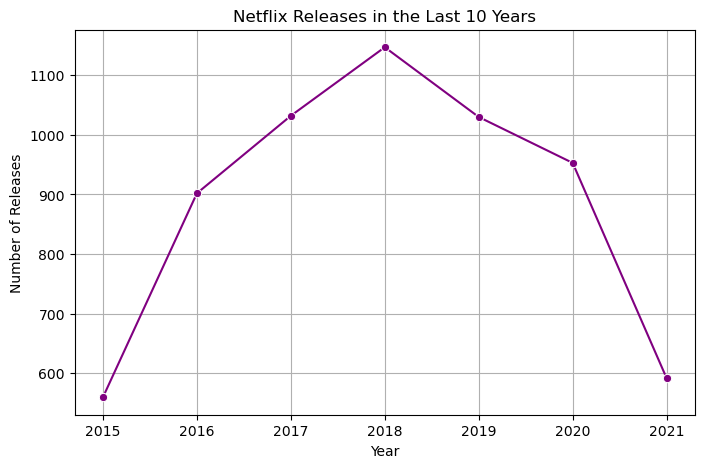

In [108]:
# Get the current year
current_year = pd.to_datetime('today').year

# Filter data for the last 10 years
last_10_years_df = df[df['release_year'] >= (current_year - 10)]

# Count releases per year
yearly_releases = last_10_years_df['release_year'].value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(8,5))
sns.lineplot(x=yearly_releases.index, y=yearly_releases.values, marker='o', color='purple')
plt.title('Netflix Releases in the Last 10 Years')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()
